## 확률변수와 상관관계
- 확률변수의 정의와 데이터 분석에 확률변수가 어떻게 사용되는지 알아본다.
- 기댓값, 분산, 표준편차의 수학적 정의와 특성을 공부한다.
- 다변수 확률변수간의 공분산과 독립의 의미를 살펴보고 상관계수로 상관관계를 측정하는 법을 알아본다.
- 조건부 기댓값의 정의와 특성을 공부하고 예측 문제에 어떻게 쓰이는지 살펴본다.

In [1]:
#한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

### 1. 확률적 데이터와 확률변수
- 확률적 데이터
    - 예측할 수 없는 값이 나오는 데이터
    - 여러 조건이나 상황에 따라 데이터값이 영향을 받기 때문일 수도 있고
    - 측정 시에 발생하는 오차 때문일 수도 있다.

- 분포: 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 정보

In [19]:
np.random.seed(0)               # 정해진 set의 난수가 나오도록 함

x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


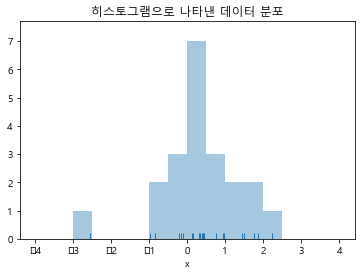

In [21]:
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

#### 기술통계
- 표본평균, 표본중앙값, 표본최빈값
    - mean(): 표본평균 계산
    - median(): 표본중앙값 계산
    - argmax(): 이산데이터의 최댓값 계산
    - histogram(): 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산.
- 표본분산, 표본표준편차
- 표본왜도, 표본첨도

In [4]:
print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233


In [5]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("최빈구간 = {}~{}".format(bins[m_bin], bins[m_bin + 1]))

최빈구간 = 0.0~0.5


#### 대칭분포
- 분포가 표본평균을 기준으로 대칭인 대칭(symmetric)분포이면 표본중앙값은 표본평균과 같다.
- 분포가 대칭분포이면서 하나의 최고값만을 가지는 단봉분포이면 표본최빈값은 표본평균과 같다.
- 대칭분포를 비대칭으로 만드는 데이터가 더해지면 표본평균이 가장 크게 영향을 받고 표본최빈값이 가장 적게 영향을 받는다.

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


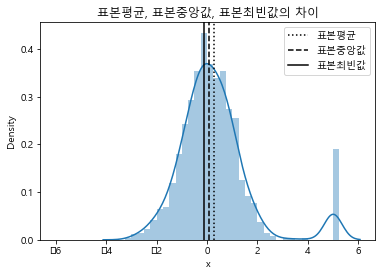

In [7]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])                   # hstack : 옆으로 배열
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

In [24]:
np.random.seed(1)
x = np.random.normal(size=1000)
print(x)
x = np.hstack([x, 5 * np.ones(50)])                   # hstack : row별로 끊어서 재배열, vstack : col별로 끊어서 재배열
print(x)

[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
  8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
  3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
 -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
 -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
 -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
  9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
 -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
 -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
 -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01
 -1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
  5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
  1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
 -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
  8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
 -7.54397941e-01  1.25286

#### 분산과 표준편차

In [8]:
import scipy as sp
import scipy.stats

sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)     # 평균=0, 표준편차=2 인 정규분포 데이터 생성
np.var(x), np.std(x)                  # 편향 표본분산, 표본표준편차

(3.896937825248617, 1.9740663173380515)

In [9]:
np.var(x, ddof=1), np.std(x, ddof=1)  # 비편향 표본분산, 표본표준편차

(3.900838663912529, 1.9750540913890255)

#### 왜도, 첨도
\begin{align}
\text{왜도} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

\begin{align}
\text{표본첨도} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

In [10]:
# 왜도와 표본첨도
sp.stats.skew(x), sp.stats.kurtosis(x)  

(0.03385895323565712, -0.0467663244783294)

#### 표본모멘트
\begin{align}
\text{표본모멘트} = 
\frac{1}{N}\sum_{i = 1}^{N} x^k_i
\end{align}

\begin{align}
\text{표본중앙모멘트} = 
\frac{1}{N}\sum_{i = 1}^{N} (x_i - \bar{x})^k
\end{align}

In [11]:
sp.stats.moment(x, 1), sp.stats.moment(x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4)

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

#### 기댓값
- 확률질량함수의 기댓값
\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}

- 확률밀도함수의 기댓값
\begin{align}
\mu_X = \text{E}[X] = \int_{-\infty}^{\infty} x p(x) dx 
\end{align}

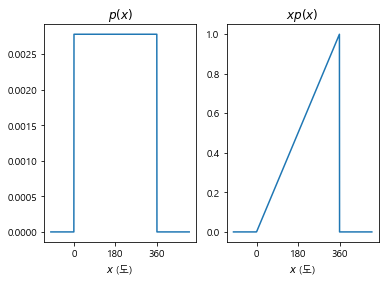

In [12]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 360)] = 1 / 360
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")

plt.show()

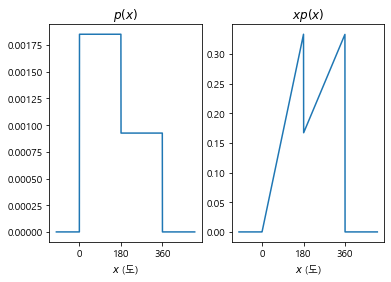

In [13]:
x = np.linspace(-100, 500, 1000)
p = np.zeros_like(x)
p[(0 < x) & (x <= 180)] = 2 / (3 * 360)
p[(180 < x) & (x <= 360)] = 1 / (3 * 360)
xp = x * p

plt.subplot(121)
plt.plot(x, p)
plt.xticks([0, 180, 360])
plt.title("$p(x)$")
plt.xlabel("$x$ (도)")

plt.subplot(122)
plt.plot(x, xp)
plt.xticks([0, 180, 360])
plt.title("$xp(x)$")
plt.xlabel("$x$ (도)")\

plt.show()